In [2]:
# for multivariate (2 or more independent vars / 1 dependent var), the same 4 assumptions apply, 
    # plus a 5th assumption: NO MULTICOLLINEARITY (no two independent vars can be highly correlated with each other)

In [18]:
# assume we're measuring iced coffee sales based on proximity to transportation and temperature, i.e.:
    # Sales = ß0 + (ßtemp * Xtemp) + (ßtransp * Xtransp) <-- simple multivariate linearity
# However, if the two X-vars have collinearity, then we include an "Interaction Term", so:

    # Sales = ß0 + (ßtemp * Xtemp) + (ßtransp * Xtransp) + (ßinteraction * temp * transp)

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
df = sns.load_dataset("penguins", cache = False)
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
# drop irrelevant columns and null rows
df_sub = df[['species', 'sex', 'bill_length_mm', 'body_mass_g']].dropna()
df_sub.head(5)

,species,sex,bill_length_mm,body_mass_g
0,Adelie,Male,39.1,3750.0
1,Adelie,Female,39.5,3800.0
2,Adelie,Female,40.3,3250.0
4,Adelie,Female,36.7,3450.0
5,Adelie,Male,39.3,3650.0


In [11]:
print(df.info())
print(df.shape)
print(df_sub.info())
print(df_sub.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
(344, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         333 non-null    object 
 1   sex             333 non-null    object 
 2   bill_length_mm  333 non-null    float64
 3   body_mass_g     333 non-null    float64
dtypes: float64(2), object(2

In [12]:
# successfully dropped 3 columns and 11 rows. Let's subset x- and y-vars
x = df_sub[['species', 'sex', 'bill_length_mm']]
y = df_sub[['body_mass_g']]

In [14]:
# import train-test-split function from sci-kit learn
from sklearn.model_selection import train_test_split

In [27]:
# create training data sets and holdout (i.e. test) data sets (a test and train per subset).
    # so for x and y, 4 total
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# test_size is the proportion of data that's held from training and used for testing. i.e. 30% test, 70% train.

In [17]:
# write out OLS formula as a string, using "C()" to mark categorical variables

ols_formula = "body_mass_g ~ bill_length_mm + C(sex) + C(species)"

In [20]:
from statsmodels.formula.api import ols

# After we've imported the ols() function, we can save the ols_data as a dataframe, create the ols object, 
    # fit the model, and generate summary statistics. At this point, it would make sense to double check the 
    # model assumptions about errors (homoscedasticity and normality of residuals).

ols_data = pd.concat([x_train, y_train], axis = 1)

In [30]:
ols_data.shape
# 233 rows (70% of data) of x AND y

(233, 4)

In [31]:
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           1.31e-92
Time:                        16:47:14   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2032.2111    354.087      5.739      0.000    1334.510    2729.913
C(sex)[T.Male]            528.9508     55.105      9.599      0.000     420.371     637.531
C(species)[T.Chinstrap]  -285.3865    106.339     -2.684      0.008    -494.920     -75.853
C(species)[T.Gentoo]     1081.6246     94.953     11.391      0.000     894.526    1268.723
bill_length_mm             35.5505      9.493      3.745      0.000      16.845      54.256
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.436
Skew:                           0.084   Prob(JB):                        0.804
Kurtosis:                       2.871   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# interpretations: 
    # R^2: 85% of the variance of body_mass is explained by species, sex, and bill_length
    # P-values: all the x variables are <0.05, and therefore are statistically significant.
    # all else being equal, we'd expect a male penguin to weigh 528.95-g more than a female
    # all else being equal, we'd expect a chinstrap penguin to weigh 285.39-g less than an Adelie
    # all else being equal, we'd expect a gentoo penguin to weigh 1081.62-g more than an Adelie
        # since "Adelie" is absent, we know it's the reference point upon which other species observations are made
    # all else being equal, we'd expect a penguin with a 1-mm longer bill to weigh 35.55-g more

In [54]:
predicted_test_values = model.predict(x_test)
comparison = pd.concat([predicted_test_values, y_test], axis=1)

In [55]:
comparison = comparison.rename(columns = {0 : 'y_predict'})

In [61]:
comparison['error'] = comparison['body_mass_g'] - comparison['y_predict']
comparison['percent_error'] = 100*(comparison['error']/comparison['body_mass_g'])
comparison.describe()

,y_predict,body_mass_g,error,percent_error
count,100.000000,100.000000,100.000000,100.000000
mean,4172.725368,4225.250000,52.524632,0.811344
std,724.305206,779.839849,279.566130,7.079726
min,3200.839610,2900.000000,-697.287040,-20.971039
25%,3439.764842,3618.750000,-94.734963,-2.444861
50%,4032.952187,4000.000000,32.670717,0.697644
75%,4711.830258,4712.500000,239.281283,5.136061
max,5630.058941,5950.000000,720.258891,15.406607


In [62]:
# average % error of the model was only 0.8% compared to the real values... not bad at all

In [63]:
# =-=-= BREAK =-=-=

In [70]:
# Adjusted R^2: an evaluation metric that penalizes unneccessary explanatory variables
    # e.g. you do a multivariate regression analysis and the model is "overfitting" or "underfitting" a variable

# Examples from Coursera: 
# Underfitting: "Consider the example of a multiple regression model that predicts the resale price of a 
    # pre-owned car. This model has two predictors: the color of the car and the year it was manufactured. 
    # The model’s R-squared value is quite low. This indicates that the model is underfitting because 
    # the current predictors do not have a strong relationship with the car’s resale price. 
    # There are likely other important predictors missing from the multiple regression model, 
# Overfitting: "Underfitting causes a multiple regression model to perform poorly on the training data, 
    # which indicates that the model performance on test data will also be substandard. In contrast, 
    # overfitting causes a model to perform well on training data, but its performance is 
    # considerably worse when evaluated using the unseen test data. That’s why data scientists 
    # compare model performance on training data versus test data to identify overfitting."
# "Generally, R-squared will continue to increase with more predictors because the model will become 
    # overly specific to the data it was built on even if the predictors do not have a strong relationship 
    # with the outcome variable. This is why a high R-squared value is not enough by itself to indicate 
    # that the model will perform well and might instead be a sign of overfitting."

# Adjusted R^2 only captures the proportion of variation explained by ind-vars that show signif. relationship
    # with the outcome variable.
# Bias-versus-variance tradeoff: as you lower one, you raise the other. You can never fully resolve the problem of
    # under/overfitting

In [71]:
data = pd.read_csv('/Users/micahevalt/Downloads/marketing_sales_data.csv')

In [72]:
data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [73]:
data.describe()

,Radio,Social Media,Sales
count,571.000000,572.000000,571.000000
mean,18.646472,3.248471,193.516937
std,9.650740,2.195696,90.516153
min,0.194576,0.013230,31.199409
25%,10.878554,1.447163,118.544562
50%,18.810430,2.945318,198.521410
75%,25.838296,4.791290,268.567987
max,48.871161,11.260430,358.420739


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [75]:
data = data.dropna()

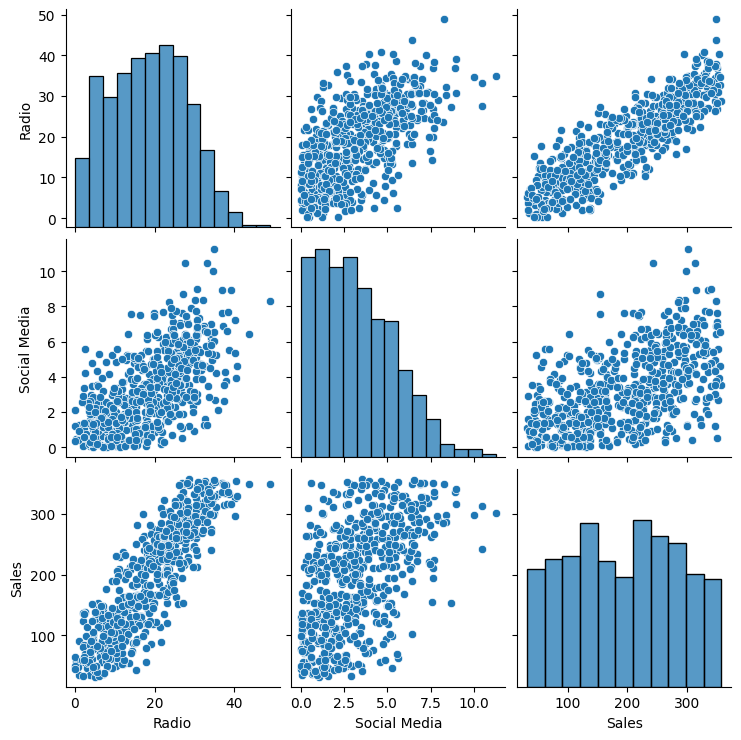

In [76]:
sns.pairplot(data)

In [77]:
# radio and sales seem to be linearly correlated. "TV" and "Influencer" were excluded b/c they aren't continuous.  

In [84]:
data[['Sales','TV']].groupby('TV').mean()

,Sales
TV,
High,300.529591
Low,91.716309
Medium,199.023461


In [85]:
data[['Sales','Influencer']].groupby('Influencer').mean()

,Sales
Influencer,
Macro,206.641805
Mega,180.385096
Micro,198.655080
Nano,189.742830


In [97]:
# TV seems to be well-correlated with Sales. Influencer might be, although I'm not sure if 
    # Mega should be <Macro or not

In [98]:
# ols() fcn doesn't run when variable names contain spaces
data = data.rename(columns={'Social Media': 'Social_Media'})

In [99]:
data.head(1)

,TV,Radio,Social_Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222


In [117]:
# Using TV because it's well-correlated and the other continuous var, Social_Media, isn't very linear
OLS_formula = 'Sales ~ Radio + C(TV)'

In [118]:
OLS = ols(formula = OLS_formula, data = data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          1.61e-287
Time:                        21:24:50   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

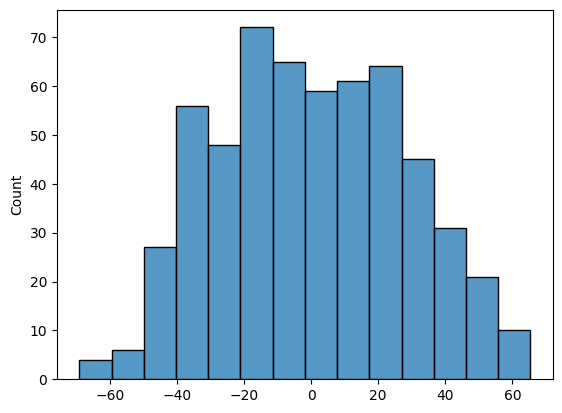

In [121]:
residuals = model.resid
resid_plot = sns.histplot(data = residuals)

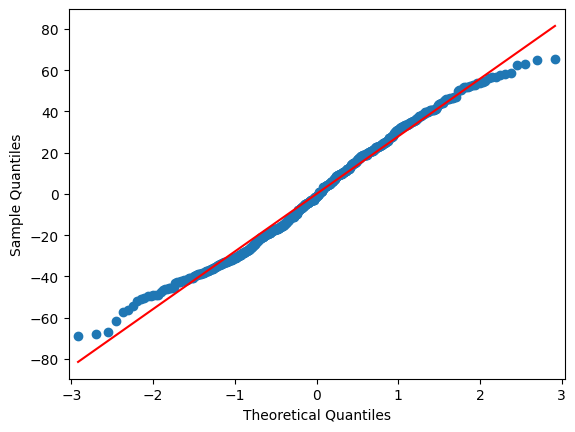

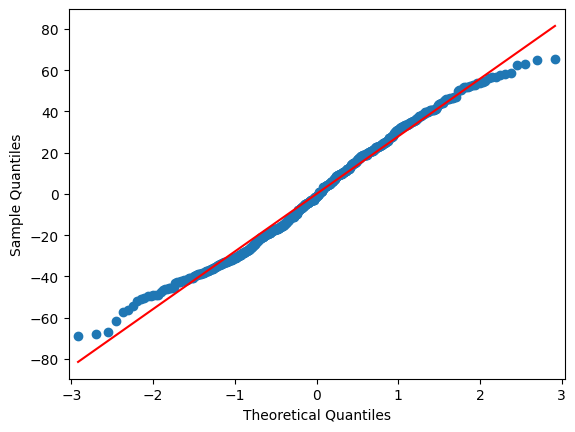

In [125]:
# residuals are roughly normal!
import statsmodels.api as sm
sm.qqplot(residuals, line='s')

<Axes: >

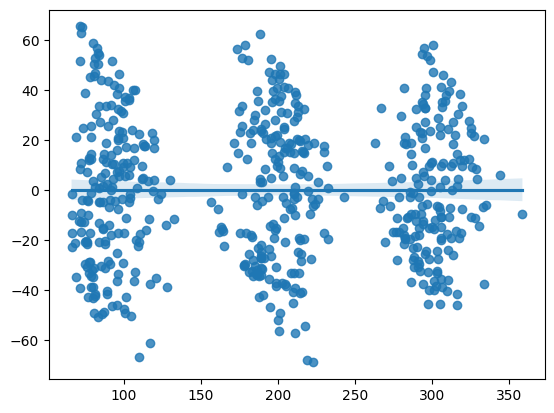

In [120]:
predicted_values = model.predict(data[['TV','Radio']])
sns.regplot(x = predicted_values, y = residuals)

In [126]:
# the fitted values are in 3 groups because TV is a categorical variable, meaning that TV is the
    # biggest factor when defining sales. However, the variance within these groups is evenly distributed
# homoscedasticity confirmed

<Axes: xlabel='TV', ylabel='Radio'>

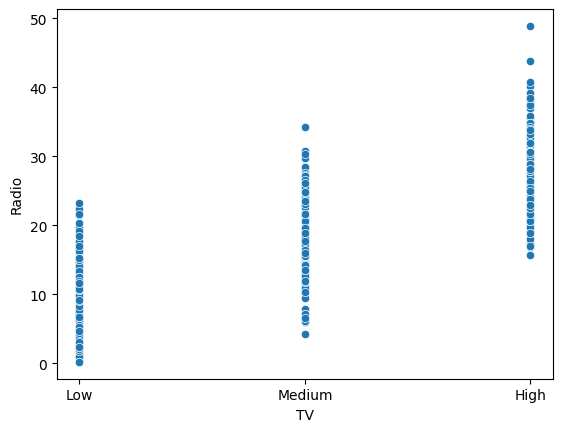

In [143]:
# testing for multicollinearity is interesting because TV is categorical...
    # since there is only one continuous independent variable, there are no multicollinearity issues.

sns.scatterplot(data = data, x = 'TV', y = 'Radio')

In [144]:
# However, imagine we were using two continuous independent vars: Radio and Social_Media:
    # can also calculate the variance inflation factor (VIF) for collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# subset independent vars
x = data[['Radio', 'Social_Media']]
# calculate the VIF for each var. this is a list with the VIF values of x, per column (Radio, Social_Media)
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

[4.932380126431932, 4.932380126431932]

In [149]:
vif_df = pd.DataFrame(vif, index=x.columns, columns = ['VIF'])
vif_df
# if VIF = 1, no correlation
# if 1 < VIF < 5, moderate correlation
# if VIF > 5, high correlation

,VIF
Radio,4.93238
Social_Media,4.93238


In [148]:
# According to the vif_df, Radio and Social_Media both have a VIF of 4.93, i.e. a high correlation,
    # which would have violated the multicollinearity assumption. 

In [ ]:
# Interpreting the model:
    # R^2 of 0.904 means that 90.4% of the variation in Sales can be explained by Radio and TV
    # Sales = 217 - 152*TVlow - 73*TVmedium + 2.88*Radio
    # The default TV category for the model is 'TVhigh' since there are only coefficients for the other two
        # since the coefficients for both these are negative, this means that the average of sales is lower
        # for TVmedium and TVlow compared to TVhigh, assuming Radio is held constant. 
    # Coefficient for Radio is positive
    # P-value for all coefficients is 0.000, meaning they are all statistically significant
    # 95%CIs should be reported when presenting the results
        # e.g. there is a 95% chance that the interval [-80.530, -66.437] contains the true TVmedium parameter.